<a href="https://colab.research.google.com/github/plaban1981/INEURON/blob/Supervised-Models/Select_right_Threshold_using_ROC_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier



In [3]:
X,y = make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=1)#weigts=[1,1]=> balanced dataset with respect to output
print(X.shape)

(2000, 20)


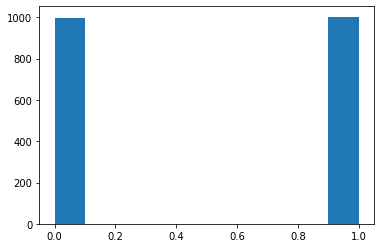

In [7]:
plt.hist(y)
plt.show()

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

## RandomForestClassifier

In [12]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_train_pred = model.predict_proba(X_train)
print(f'Training data - RandoForestClassifier - ROC AUC Score : {roc_auc_score(y_train,y_train_pred[:,1])}')
y_test_pred = rf.predict_proba(X_test)
print(f'Test data - RandoForestClassifier - ROC AUC Score : {roc_auc_score(y_test,y_test_pred[:,1])}')

Training data - RandoForestClassifier - ROC AUC Score : 1.0
Test data - RandoForestClassifier - ROC AUC Score : 0.9887997199929999


## Logistic Regression

In [13]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_train_pred = model.predict_proba(X_train)
print(f'Training data - LogisticRegression - ROC AUC Score : {roc_auc_score(y_train,y_train_pred[:,1])}')
y_test_pred = rf.predict_proba(X_test)
print(f'Test data - LogisticRegression - ROC AUC Score : {roc_auc_score(y_test,y_test_pred[:,1])}')

Training data - LogisticRegression - ROC AUC Score : 0.9859918372959324
Test data - LogisticRegression - ROC AUC Score : 0.9887997199929999


## AdaboostClassifier

In [14]:
model = AdaBoostClassifier()
model.fit(X_train,y_train)
y_train_pred = model.predict_proba(X_train)
print(f'Training data - AdaboostClassifier - ROC AUC Score : {roc_auc_score(y_train,y_train_pred[:,1])}')
y_test_pred = rf.predict_proba(X_test)
print(f'Test data - AdaboostClassifier - ROC AUC Score : {roc_auc_score(y_test,y_test_pred[:,1])}')

Training data - AdaboostClassifier - ROC AUC Score : 0.9965046001150029
Test data - AdaboostClassifier - ROC AUC Score : 0.9887997199929999


##KNNCalssifier

In [16]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_train_pred = model.predict_proba(X_train)
print(f'Training data - Knearest Neigbors - ROC AUC Score : {roc_auc_score(y_train,y_train_pred[:,1])}')
y_test_pred = rf.predict_proba(X_test)
print(f'Test data - Knearest Neigbors - ROC AUC Score : {roc_auc_score(y_test,y_test_pred[:,1])}')

Training data - Knearest Neigbors - ROC AUC Score : 0.9799213730343259
Test data - Knearest Neigbors - ROC AUC Score : 0.9887997199929999


## Selecting the best threshold for accuracy

In [19]:
pred = []
for model in [LogisticRegression(),RandomForestClassifier(),AdaBoostClassifier(),KNeighborsClassifier()]:
  model.fit(X_train,y_train)
  pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction = pd.concat(pred,axis=1).mean(axis=1)
print(f'Ensemble test roc auc score :{roc_auc_score(y_test,final_prediction)}')


Ensemble test roc auc score :0.988724718117953


In [21]:
pred

[0      0.989774
 1      0.000009
 2      0.972823
 3      0.721809
 4      0.803965
          ...   
 395    0.994052
 396    0.805889
 397    0.686832
 398    0.000628
 399    0.989800
 Length: 400, dtype: float64, 0      0.95
 1      0.02
 2      0.95
 3      0.83
 4      0.71
        ... 
 395    0.99
 396    0.82
 397    0.52
 398    0.05
 399    1.00
 Length: 400, dtype: float64, 0      0.542292
 1      0.459245
 2      0.535539
 3      0.500480
 4      0.496834
          ...   
 395    0.550197
 396    0.534903
 397    0.494029
 398    0.465754
 399    0.546334
 Length: 400, dtype: float64, 0      1.0
 1      0.0
 2      0.8
 3      0.8
 4      0.4
       ... 
 395    0.8
 396    1.0
 397    0.8
 398    0.2
 399    0.8
 Length: 400, dtype: float64]

In [20]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.989774,0.95,0.542292,1.0
1,0.000009,0.02,0.459245,0.0
2,0.972823,0.95,0.535539,0.8
3,0.721809,0.83,0.500480,0.8
4,0.803965,0.71,0.496834,0.4
...,...,...,...,...
395,0.994052,0.99,0.550197,0.8
396,0.805889,0.82,0.534903,1.0
397,0.686832,0.52,0.494029,0.8
398,0.000628,0.05,0.465754,0.2


In [22]:
final_prediction

0      0.870516
1      0.119813
2      0.814590
3      0.713072
4      0.602700
         ...   
395    0.833562
396    0.790198
397    0.625215
398    0.179096
399    0.834034
Length: 400, dtype: float64

## Roc Curve

In [23]:
fpr,tpr,thresholds = roc_curve(y_test,final_prediction)
thresholds

array([1.92698558, 0.92698558, 0.91131973, 0.91117965, 0.75890838,
       0.75845052, 0.75482975, 0.75149364, 0.74123084, 0.74028477,
       0.70219083, 0.70185269, 0.69353074, 0.65980237, 0.63030927,
       0.62521521, 0.60269985, 0.58739845, 0.56698384, 0.56511035,
       0.5478233 , 0.53418488, 0.51650139, 0.50776837, 0.4628474 ,
       0.44260717, 0.42317778, 0.41326177, 0.41324909, 0.40146561,
       0.38278389, 0.21040201, 0.21022466, 0.10586113])

In [30]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
  y_pred = np.where(final_prediction > thres,1,0)
  accuracy_ls.append(accuracy_score(y_test,y_pred))

accuracy_df = pd.concat([pd.Series(thresholds),pd.Series(accuracy_ls)],axis=1)
accuracy_df.columns=['Thresholds','Accuracy']
accuracy_df.sort_values(by='Accuracy',ascending=False,inplace=True)
accuracy_df.head()


,Thresholds,Accuracy
25,0.442607,0.96
24,0.462847,0.96
23,0.507768,0.96
21,0.534185,0.96
19,0.565110,0.96


## Roc Curve

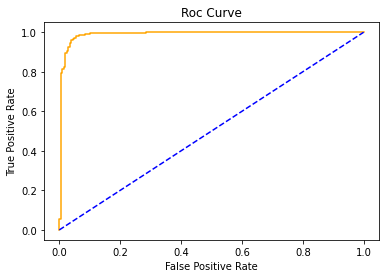

In [31]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve')
plt.show()